In [17]:
# http://brettbeauregard.com/blog/2011/04/improving-the-beginners-pid-introduction/

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

matplotlib.rcParams['figure.figsize'] = [9, 6]
%matplotlib notebook  

<IPython.core.display.Javascript object>


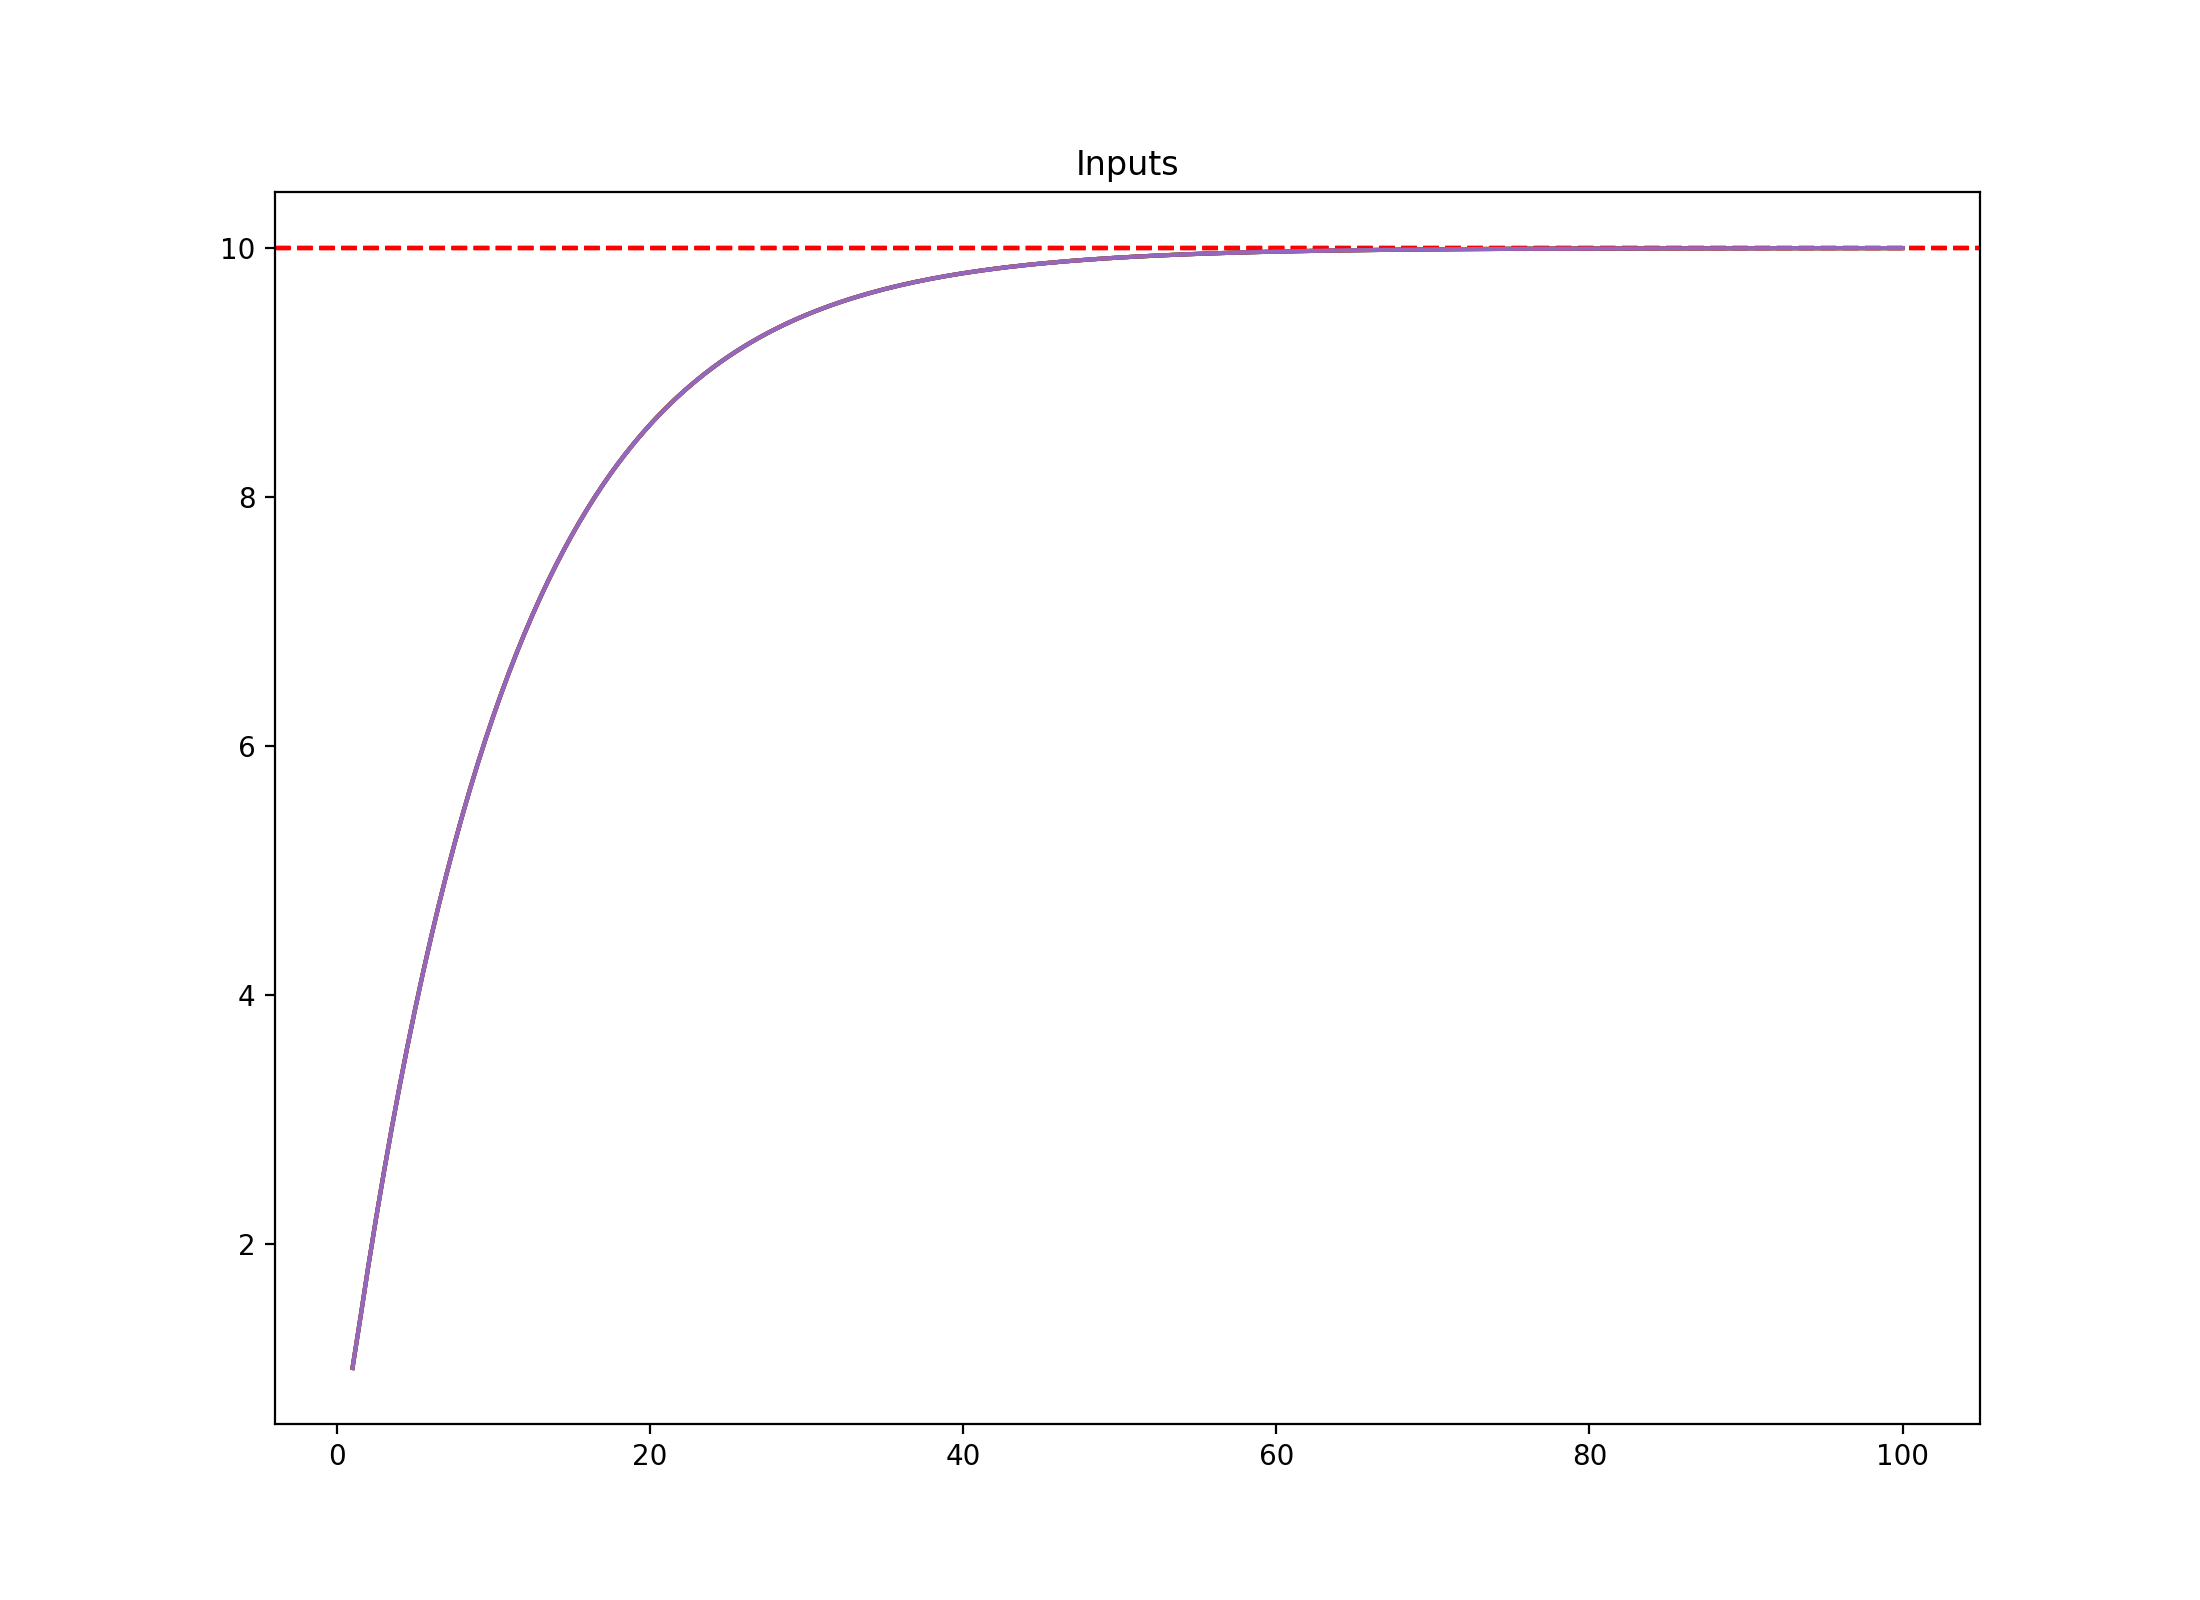

In [11]:
# working variables
class Pid(object):
    last_time = 0
    input_value = 0
    output = 0
    err_sum = 0
    derr = 0
    last_err = 0
    def __init__(self, kp, ki, kd, setpoint):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.setpoint = setpoint
    
    def compute(self, now):
        # How long since we last calculated
        # now = millis();
        time_change = now - self.last_time;

        # Compute all the working error variables
        error = self.setpoint - self.input_value;
        self.err_sum += (error * time_change);
        self.derr = (error - self.last_err) / time_change;

        # Compute PID Output 
        self.output = self.kp * error + self.ki * self.err_sum + self.kd * self.derr;

        # Remember some variables for next time
        self.last_err = error;
        self.last_time = now;
        
    
pid = Pid( 0.1, 0.00, 0.01, 10)
positions = []
for i in range(1,200):
    pid.compute(i/10)
    pid.input_value = pid.input_value + (pid.output * 0.5 )
#     print(f'input:{pid.input_value:0.5f}  output: {pid.output:0.5f}  derr: {pid.derr:0.5f}')
    positions.append(pid.input_value)
    
    
x = np.linspace(1, 100, len(positions))
plt.axhline(y = pid.setpoint, color = 'r', linestyle = '--')
plt.plot(x, positions)
plt.title('Inputs')
plt.show()

input:0.50000  output: 1.00000  derr: 10.00000
input:1.47500  output: 1.95000  derr: -0.50000
input:2.37625  output: 1.80250  derr: -0.97500
input:3.18369  output: 1.61488  derr: -0.90125
input:3.90569  output: 1.44401  derr: -0.80744
input:4.55122  output: 1.29106  derr: -0.72200
input:5.12838  output: 1.15431  derr: -0.64553
input:5.64440  output: 1.03204  derr: -0.57715
input:6.10576  output: 0.92272  derr: -0.51602
input:6.51825  output: 0.82498  derr: -0.46136
input:6.88705  output: 0.73760  derr: -0.41249
input:7.21678  output: 0.65947  derr: -0.36880
input:7.51159  output: 0.58962  derr: -0.32974
input:7.77517  output: 0.52716  derr: -0.29481
input:8.01084  output: 0.47132  derr: -0.26358
input:8.22154  output: 0.42140  derr: -0.23566
input:8.40992  output: 0.37676  derr: -0.21070
input:8.57834  output: 0.33685  derr: -0.18838
input:8.72893  output: 0.30117  derr: -0.16843


<IPython.core.display.Javascript object>


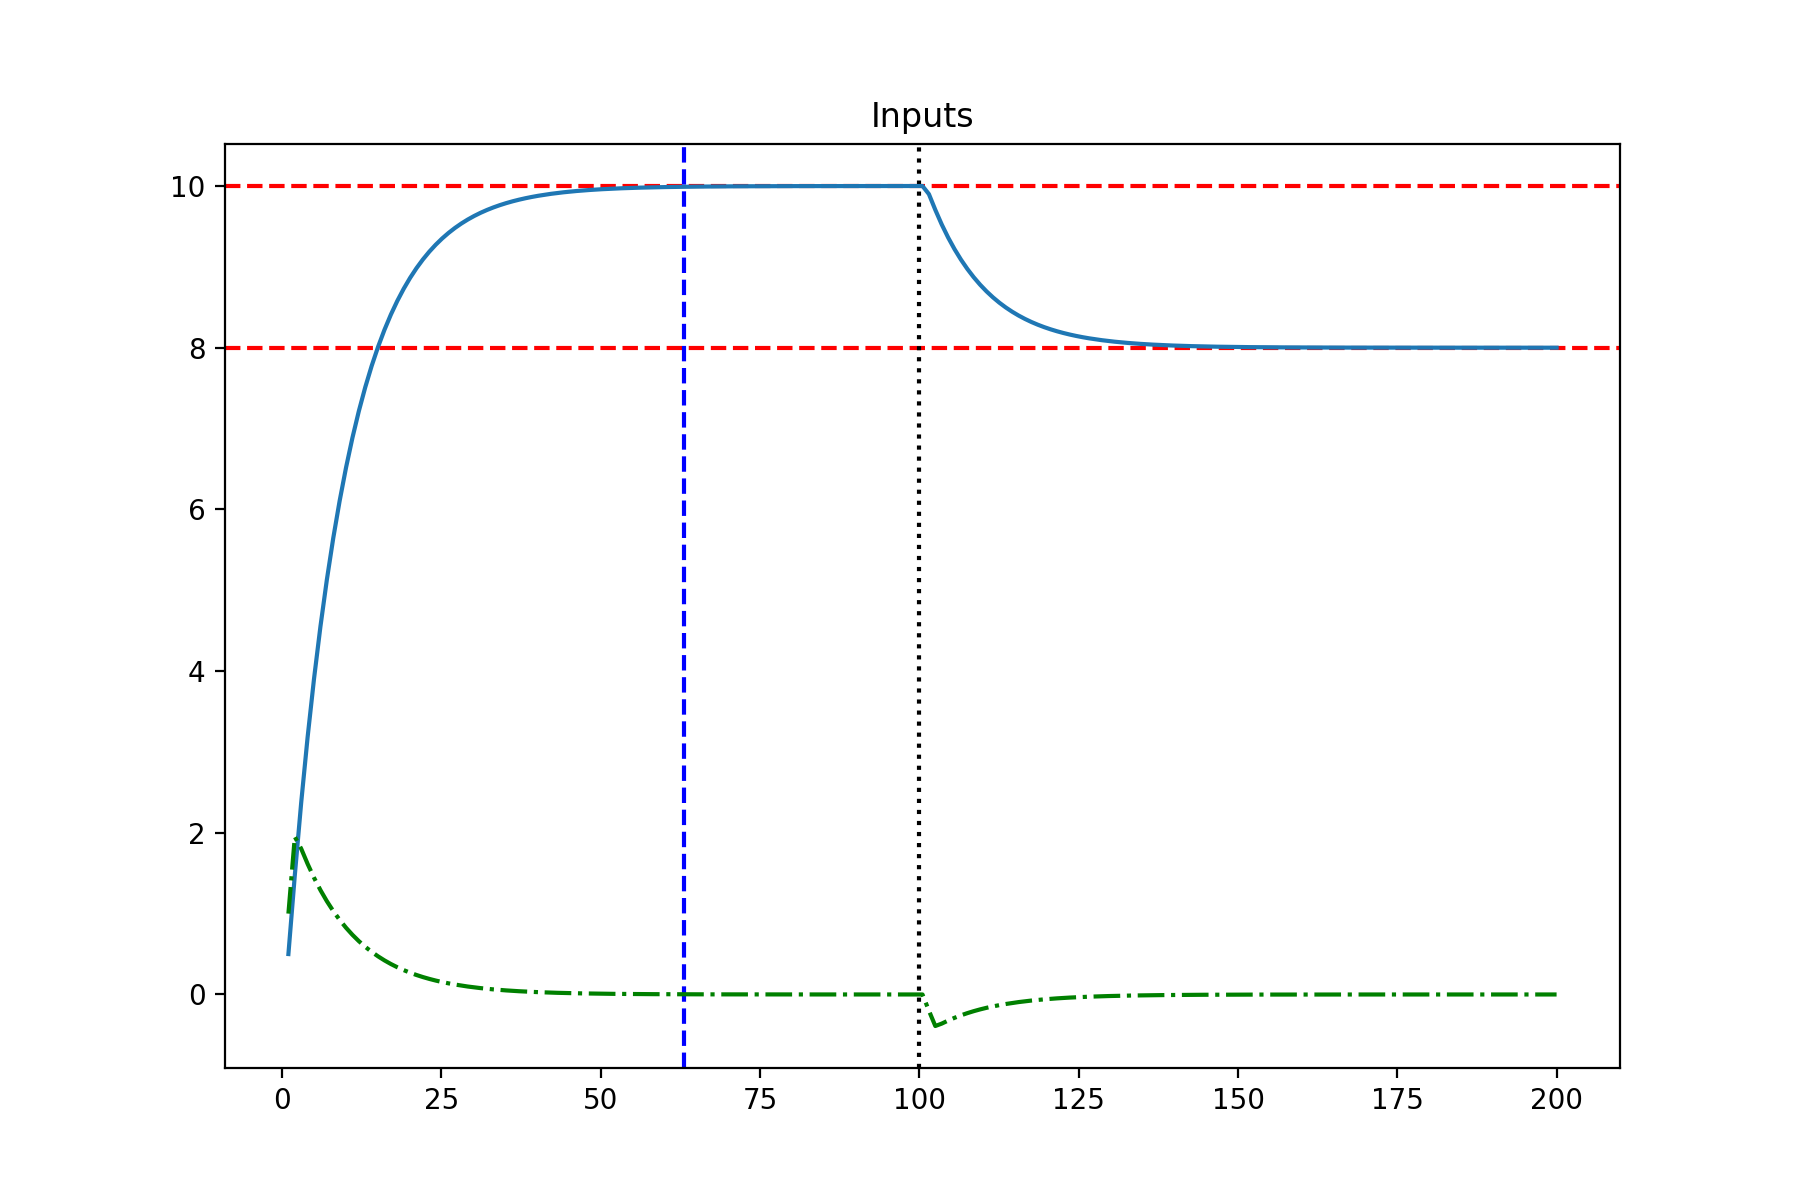

Goal = 63


In [83]:
# working variables
class Pid(object):
    last_time:float = 0.0
    input_value:float = 0.0
    output:float = 0.0
    err_sum:float = 0.0
    derr:float = 0.0
    last_err:float = 0.0
    sample_time:int = 1 #1 sec

    def __init__(self, kp:float, ki:float, kd:float, setpoint:float):
        self.kp = kp
        self.ki = ki * self.sample_time
        self.kd = kd * self.sample_time
        self.setpoint = setpoint
    
    def compute(self, now:float):
        # How long since we last calculated
        # now = millis();
        time_change = now - self.last_time;

        if time_change >= self.sample_time:
            # Compute all the working error variables
            error = self.setpoint - self.input_value;
            self.err_sum += error;
            self.derr = (error - self.last_err);

            # Compute PID Output 
            self.output = self.kp * error + self.ki * self.err_sum + self.kd * self.derr;

            # Remember some variables for next time
            self.last_err = error;
            self.last_time = now;
            
    def set_sample_time(self, new_sample_time:float):
        if new_sample_time > 0:
            ratio = new_sample_time/self.sample_time
            self.ki *= ratio
            self.kd /= ratio
            self.sample_time = new_sample_time
            


    
pid = Pid( 0.2, 0.0, -0.1, 10)
positions = []
outputs = []
goal = None
for i in range(1,200):
    pid.compute(i)
    pid.input_value = pid.input_value + (pid.output*0.5)
    outputs.append(pid.output)
    if (goal is None) and (abs(pid.input_value - pid.setpoint) < 0.01):
        goal = i
    if i < 20:
        print(f'input:{pid.input_value:0.5f}  output: {pid.output:0.5f}  derr: {pid.derr:0.5f}')
    positions.append(pid.input_value)
    if i == 100:
        pid.setpoint = 8
    
    
x = np.linspace(1, 200, len(positions))
plt.axhline(y = 10, color = 'r', linestyle = '--')
plt.axhline(y = 8, color = 'r', linestyle = '--')
if goal is not None:
    plt.axvline(x=goal, color = 'b', linestyle = '--')
    print(f'Goal = {goal}')
plt.axvline(x=100, color = 'black', linestyle = 'dotted')
plt.plot(x, positions)
plt.plot(x, outputs, linestyle = '-.', color = 'green')


plt.title('Inputs')
plt.show()


input:3.00000  output: 3.00000  derr: 10.00000
input:4.50000  output: 1.50000  derr: -3.00000
input:5.85000  output: 1.35000  derr: -1.50000
input:6.82500  output: 0.97500  derr: -1.35000
input:7.58250  output: 0.75750  derr: -0.97500
input:8.15625  output: 0.57375  derr: -0.75750
input:8.59463  output: 0.43837  derr: -0.57375
input:8.92856  output: 0.33394  derr: -0.43838
input:9.18321  output: 0.25464  derr: -0.33394
input:9.37732  output: 0.19411  derr: -0.25464
input:9.52530  output: 0.14798  derr: -0.19411
input:9.63811  output: 0.11281  derr: -0.14798
input:9.72412  output: 0.08600  derr: -0.11281
input:9.78968  output: 0.06556  derr: -0.08600
input:9.83966  output: 0.04998  derr: -0.06556
input:9.87777  output: 0.03810  derr: -0.04998
input:9.90682  output: 0.02905  derr: -0.03810
input:9.92896  output: 0.02215  derr: -0.02905
input:9.94584  output: 0.01688  derr: -0.02215


<IPython.core.display.Javascript object>


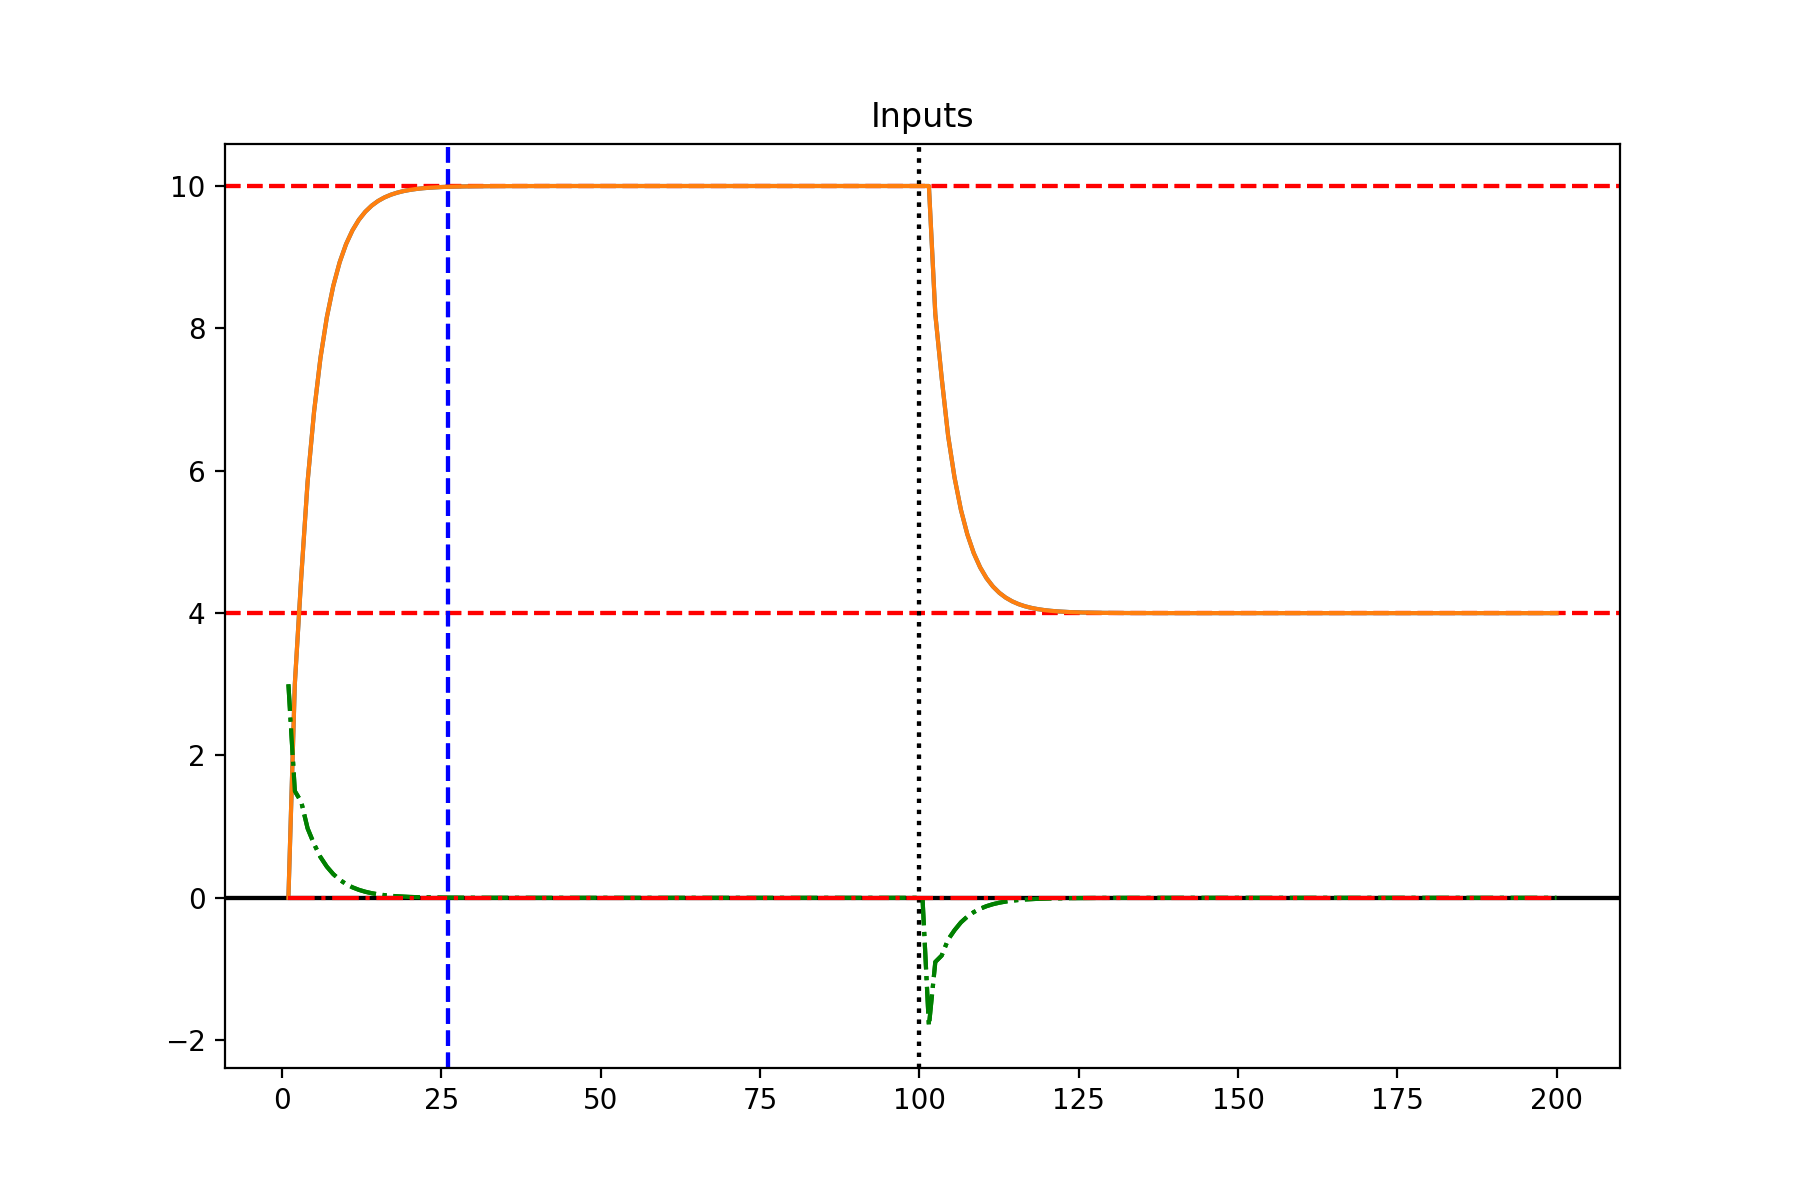

Goal = 26


In [111]:
# working variables
class Pid(object):
    last_time:float = 0.0
    input_value:float = 0.0
    last_input: float = 0.0
    output:float = 0.0
    ki_term:float = 0.0
    derr:float = 0.0
    last_err:float = 0.0
    sample_time:int = 1 #1 sec

    def __init__(self, kp:float, ki:float, kd:float, setpoint:float):
        self.kp = kp
        self.ki = ki * self.sample_time
        self.kd = kd * self.sample_time
        self.setpoint = setpoint
    
    def compute(self, now:float):
        # How long since we last calculated
        # now = millis();
        time_change = now - self.last_time

        if time_change >= self.sample_time:
            # Compute all the working error variables
            error = self.setpoint - self.input_value
            self.derr = (error - self.last_err)
            delta_input = self.input_value - self.last_input 
            self.ki_term += self.ki * error

            # Compute PID Output 
            self.output = (self.kp * error) + self.ki_term - (self.kd * delta_input)

            # Remember some variables for next time
            self.last_err = error
            self.last_time = now
            self.last_input = self.input_value
            
    def set_sample_time(self, new_sample_time:float):
        if new_sample_time > 0:
            ratio = new_sample_time/self.sample_time
            self.ki *= ratio
            self.kd /= ratio
            self.sample_time = new_sample_time
            


    
pid = Pid( 0.3, 0.00, 0.2, 10)
positions = []
outputs = []
goal = None
for i in range(1,200):
    positions.append(pid.input_value)
    pid.compute(i)
    pid.input_value = pid.input_value + (pid.output)
    outputs.append(pid.output)
    if (goal is None) and (abs(pid.input_value - pid.setpoint) < 0.01):
        goal = i
    if i < 20:
        print(f'input:{pid.input_value:0.5f}  output: {pid.output:0.5f}  derr: {pid.derr:0.5f}')
    if i == 100:
        pid.setpoint = 4
    
    
x = np.linspace(1, 200, len(positions))
plt.axhline(y = 10, color = 'r', linestyle = '--')
plt.axhline(y = 4, color = 'r', linestyle = '--')
plt.axhline(y = 0, color = 'black', linestyle = '-')
if goal is not None:
    plt.axvline(x=goal, color = 'b', linestyle = '--')
    print(f'Goal = {goal}')
plt.axvline(x=100, color = 'black', linestyle = 'dotted')
plt.plot(x, positions)
plt.plot(x, outputs, linestyle = '-.', color = 'green')


plt.title('Inputs')
plt.show()


input:1.00000  output: 1.00000  derr: 10.00000 kp:0.90000 ki: 0.00000 delta_input:-0.00000
input:2.20000  output: 1.20000  derr: -1.00000 kp:0.78000 ki: 0.00000 delta_input:-0.30000
input:3.34000  output: 1.14000  derr: -1.20000 kp:0.66600 ki: 0.00000 delta_input:-0.36000
input:4.34800  output: 1.00800  derr: -1.14000 kp:0.56520 ki: 0.00000 delta_input:-0.34200
input:5.21560  output: 0.86760  derr: -1.00800 kp:0.47844 ki: 0.00000 delta_input:-0.30240
input:5.95432  output: 0.73872  derr: -0.86760 kp:0.40457 ki: 0.00000 delta_input:-0.26028
input:6.58050  output: 0.62618  derr: -0.73872 kp:0.34195 ki: 0.00000 delta_input:-0.22162
input:7.11031  output: 0.52980  derr: -0.62618 kp:0.28897 ki: 0.00000 delta_input:-0.18786
input:7.55822  output: 0.44791  derr: -0.52980 kp:0.24418 ki: 0.00000 delta_input:-0.15894
input:7.93677  output: 0.37855  derr: -0.44791 kp:0.20632 ki: 0.00000 delta_input:-0.13437
input:8.25666  output: 0.31989  derr: -0.37855 kp:0.17433 ki: 0.00000 delta_input:-0.11357

<IPython.core.display.Javascript object>


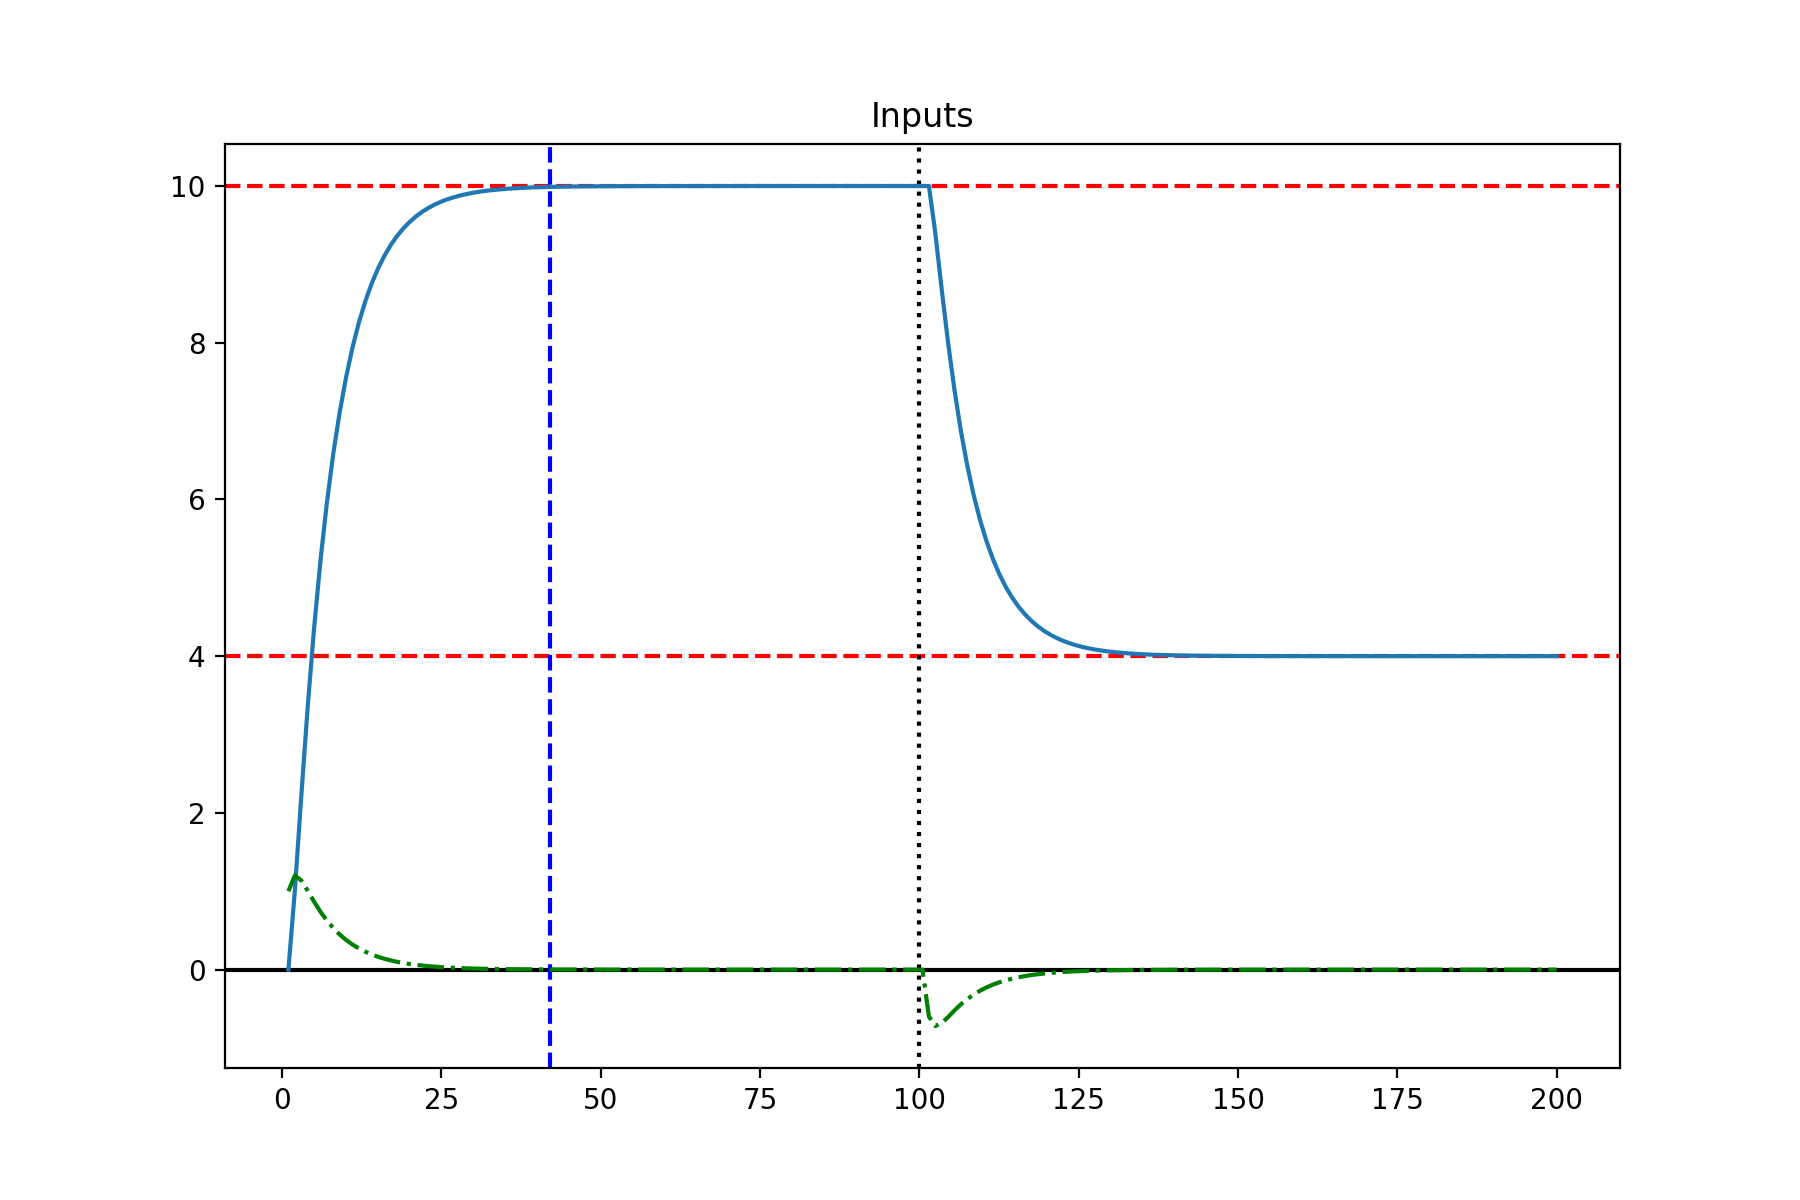

Goal = 42


In [138]:
# working variables
class Pid(object):
    last_time:float = 0.0
    input_value:float = 0.0
    last_input: float = 0.0
    output:float = 0.0
    ki_term:float = 0.0
    derr:float = 0.0
    last_err:float = 0.0
    delta_input:float = 0.0
    output_max_value = 10000.0
    output_min_value = -10000.0
    sample_time:int = 1 #1 sec

    def __init__(self, kp:float, ki:float, kd:float, setpoint:float):
        self.kp = kp
        self.ki = ki * self.sample_time
        self.kd = kd * self.sample_time
        self.setpoint = setpoint
    
    def compute(self, now:float):
        # How long since we last calculated
        # now = millis();
        time_change = now - self.last_time

        if time_change >= self.sample_time:
            # Compute all the working error variables
            error = self.setpoint - self.input_value
            self.derr = (error - self.last_err)
            self.delta_input = self.input_value - self.last_input 
            self.ki_term += self.ki * error
            self.check_ki_term_limits()

            # Compute PID Output 
            self.output = (self.kp * error) + self.ki_term - (self.kd * self.delta_input)
            self.check_output_limits()

            # Remember some variables for next time
            self.last_err = error
            self.last_time = now
            self.last_input = self.input_value
            
    def set_sample_time(self, new_sample_time:float):
        if new_sample_time > 0:
            ratio = new_sample_time/self.sample_time
            self.ki *= ratio
            self.kd /= ratio
            self.sample_time = new_sample_time
    
    def set_output_limits(self, min_value:float, max_value:float):
        if min_value > max_value:
            return
        self.output_min_value = min_value
        self.output_max_value = max_value
        self.check_output_limits()
        self.check_ki_term_limits()
    
    def check_output_limits(self):
        self.output = min(self.output, self.output_max_value)
        self.output = max(self.output, self.output_min_value)
        
    def check_ki_term_limits(self):
        self.ki_term = min(self.ki_term, self.output_max_value)
        self.ki_term = max(self.ki_term, self.output_min_value)
        
    
pid = Pid( 0.1, 0.0, -0.3, 10)
pid.set_output_limits(-2.0, 2)
positions = []
outputs = []
ki_term = []
goal = None
for i in range(1,200):
    positions.append(pid.input_value)
    pid.compute(i)
    pid.input_value = pid.input_value + (pid.output)
    outputs.append(pid.output)
    ki_term.append(pid.ki_term)
    if (goal is None) and (abs(pid.input_value - pid.setpoint) < 0.01):
        goal = i
    if i < 200:
        print(f'input:{pid.input_value:0.5f}  output: {pid.output:0.5f}  derr: {pid.derr:0.5f} kp:{pid.kp * (pid.setpoint - pid.input_value):0.5f} ki: {pid.ki_term:0.5f} delta_input:{pid.kd * pid.delta_input:0.5f}')
    if i == 100:
        pid.setpoint = 4
    
    
x = np.linspace(1, 200, len(positions))
plt.axhline(y = 10, color = 'r', linestyle = '--')
plt.axhline(y = 4, color = 'r', linestyle = '--')
plt.axhline(y = 0, color = 'black', linestyle = '-')
if goal is not None:
    plt.axvline(x=goal, color = 'b', linestyle = '--')
    print(f'Goal = {goal}')
plt.axvline(x=100, color = 'black', linestyle = 'dotted')
plt.plot(x, positions)
plt.plot(x, outputs, linestyle = '-.', color = 'green')
# plt.plot(x, ki_term, linestyle = '-.', color = 'red')



plt.title('Inputs')
plt.show()
